## Nguyen Ngoc Dat 11200745 DSEB62

In [349]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import datasets

In [350]:
# data = datasets.load_iris()
# data

### Problem 2: Implement thuật toán PCA bằng numpy

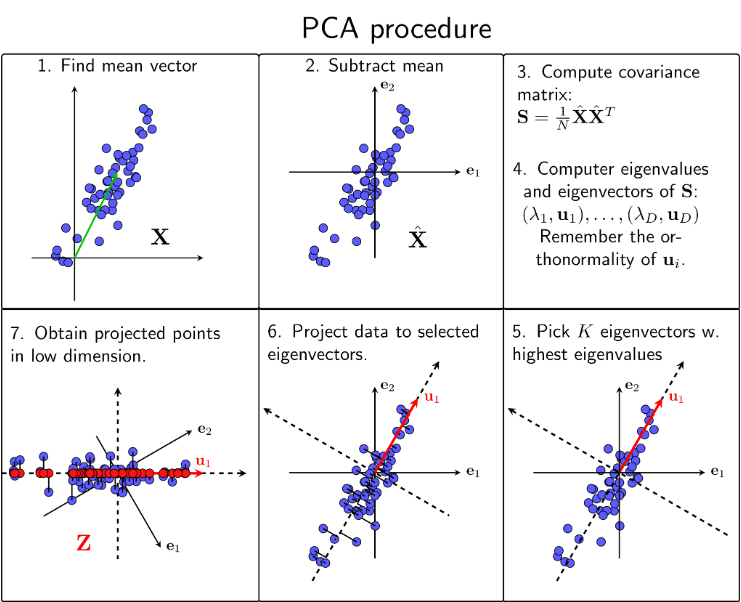

In [1]:
class PCA:
    
    def __init__(self, n_components):
        self._n_components = n_components
        self._components = None
        self.mean = None
        self.eigenvalues = None
        
    
    def fit(self, X):
        self.mean = np.mean(X, axis =0)
        
        X = X - self.mean 
        
        covariance_matrix = np.cov(X.T)
        
        self.eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        
        eigenvectors = eigenvectors.T
        sorted_index = np.argsort(self.eigenvalues)[::-1]
        self.eigenvalues = self.eigenvalues[sorted_index]
        eigenvectors = eigenvectors[sorted_index]
        
        self._components = eigenvectors[0:self._n_components]
    
    def print_eigenvalues(self):  
        return self.eigenvalues
    
    def transform(self, X):
        X = self.mean - X
        return np.dot(X, self._components.T)

### Problem 3: Giảm dữ liệu iris về 2 chiều

In [351]:
data = pd.read_csv('Iris.csv')
data = data.drop(columns = 'Id')

In [372]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Problem 3-a: Visualize dữ liệu giảm chiều với scatter plot và label của hoa

In [354]:
X = data.iloc[:,0:4]
y = data.iloc[:,4]

In [355]:
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

In [356]:
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(y)] , axis = 1)

In [374]:
principal_df

,PC1,PC2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

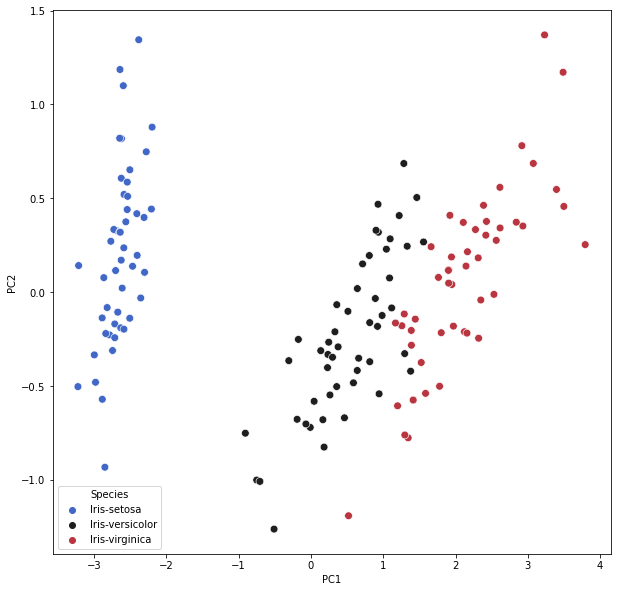

In [377]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = principal_df, x = 'PC1', y = 'PC2' , hue = y , s = 60 , palette= 'icefire')

### Problem 3-b: Vẽ explained variance graph với các chiều của dữ liệu

In [358]:
pca.print_eigenvalues()

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [359]:
sum_explained_variance = sum(pca.print_eigenvalues())
sum_explained_variance

4.569291275167783

In [370]:
# Calculating the explained variance on each of components
explained_variance = []
for eigen_value in pca.print_eigenvalues():
    explained_variance.append(eigen_value/sum_explained_variance * 100)

print(explained_variance)


[92.46162071742683, 5.3015567850534895, 1.7185139525006876, 0.5183085450189981]


In [371]:
fig = px.line(
    y = explained_variance,
    x = [1,2,3,4],
    title='Explained variance vs Number of components',
    labels=dict(x="Number of components", y="Cumulative Explained Variance")
)
fig.show()

### PCA trong sklearn

In [367]:
from sklearn.decomposition import PCA
pca_sk = PCA(n_components=2)
principal = pca_sk.fit_transform(X)
principal_df = pd.DataFrame(principal , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [368]:
principal_df

,PC1,PC2,Species
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

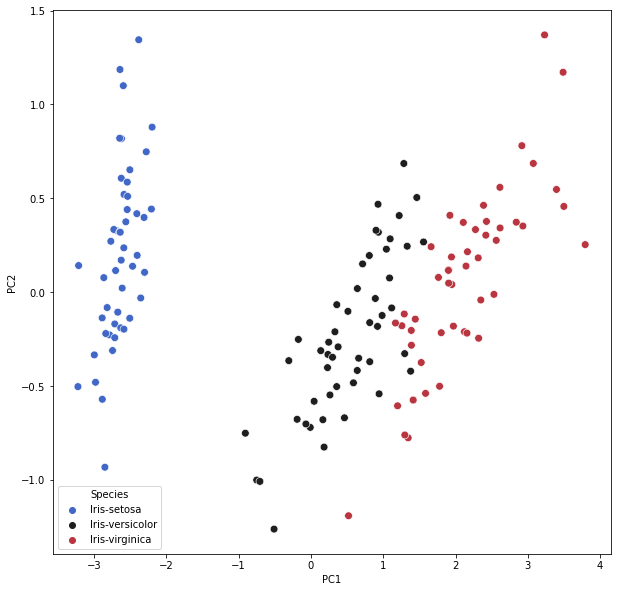

In [376]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'Species' , s = 60 , palette= 'icefire')